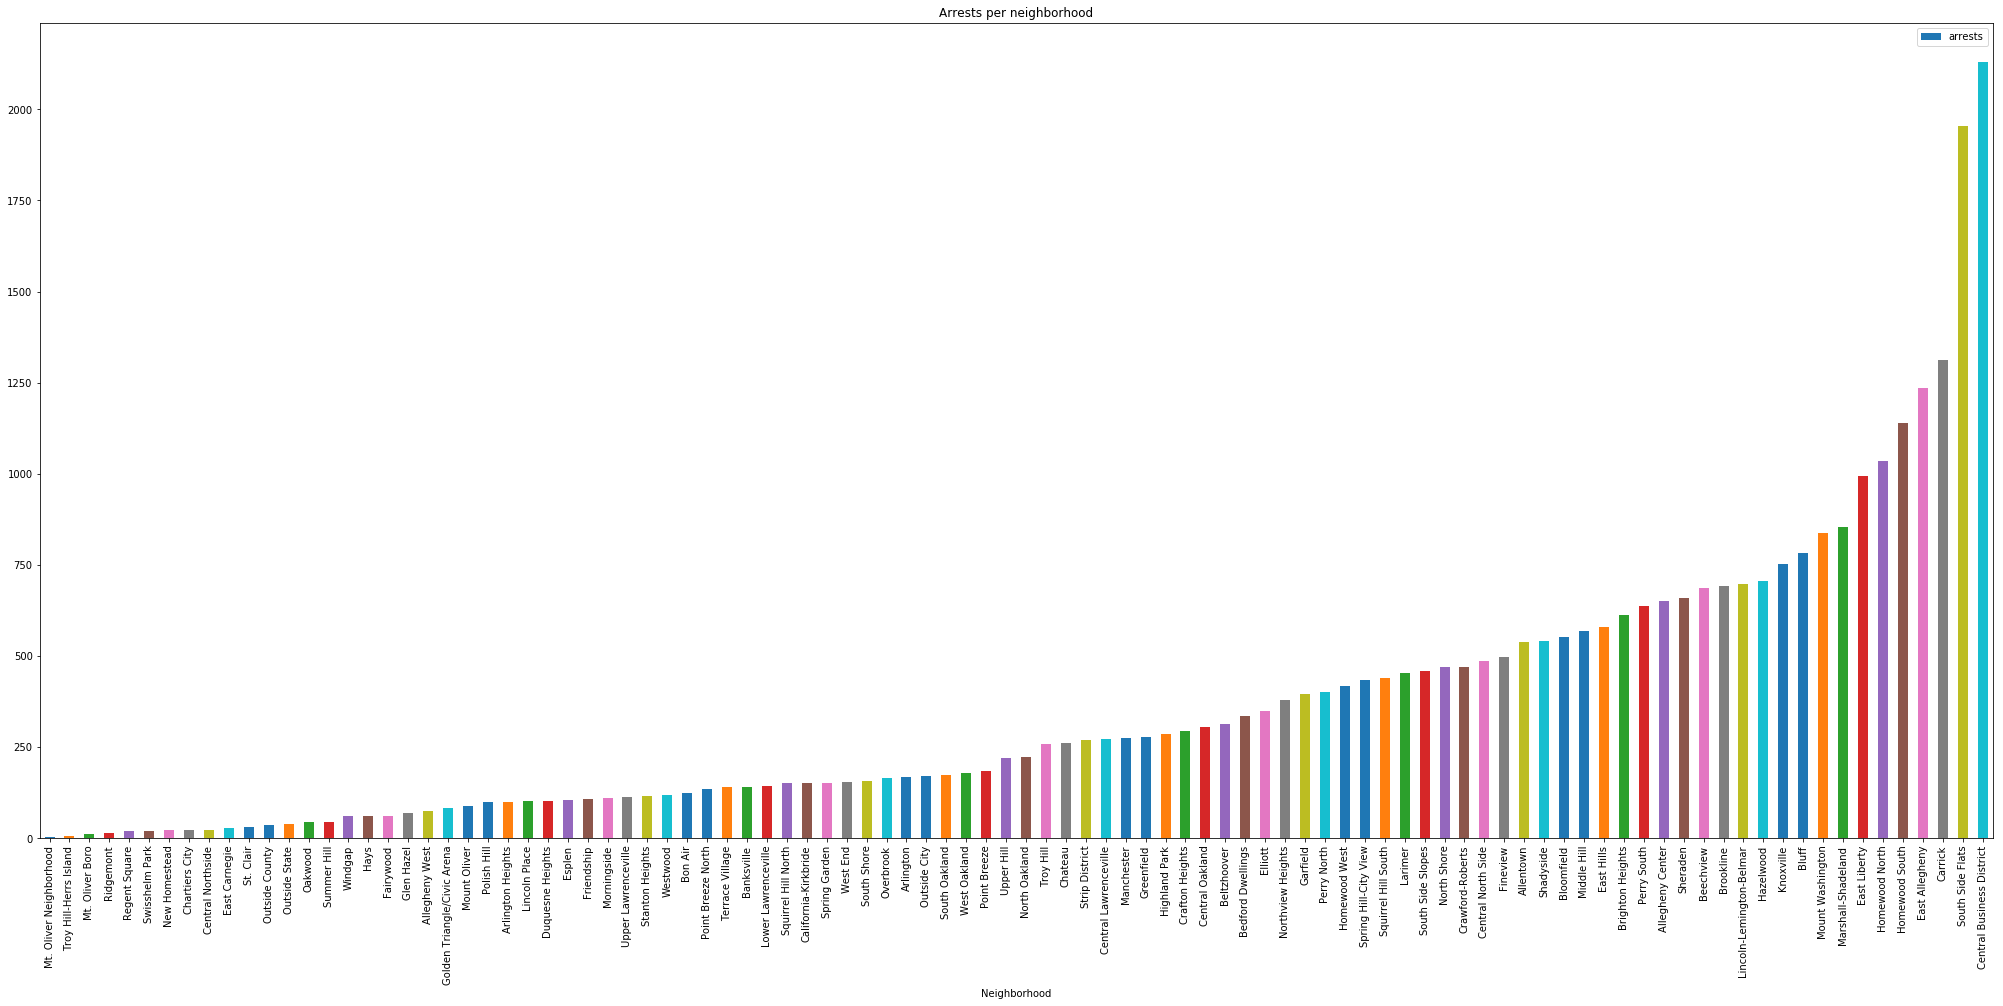

In [60]:
import pandas as pd
import numpy as np

arrests = pd.read_csv("arrests.csv")
arrests
arrest_count = arrests.groupby("INCIDENTNEIGHBORHOOD").count()["PK"]
arrest_count = arrest_count.sort_values(ascending = True)
arrest_count_df = arrest_count.to_frame()
arrest_count_df = arrest_count_df.reset_index(level = 'INCIDENTNEIGHBORHOOD')
arrest_count_df.columns=["Neighborhood", "arrests"]

arrest_count_df.plot(kind = 'bar', figsize = (35, 15), title = 'Arrests per neighborhood', x="Neighborhood", y="arrests")

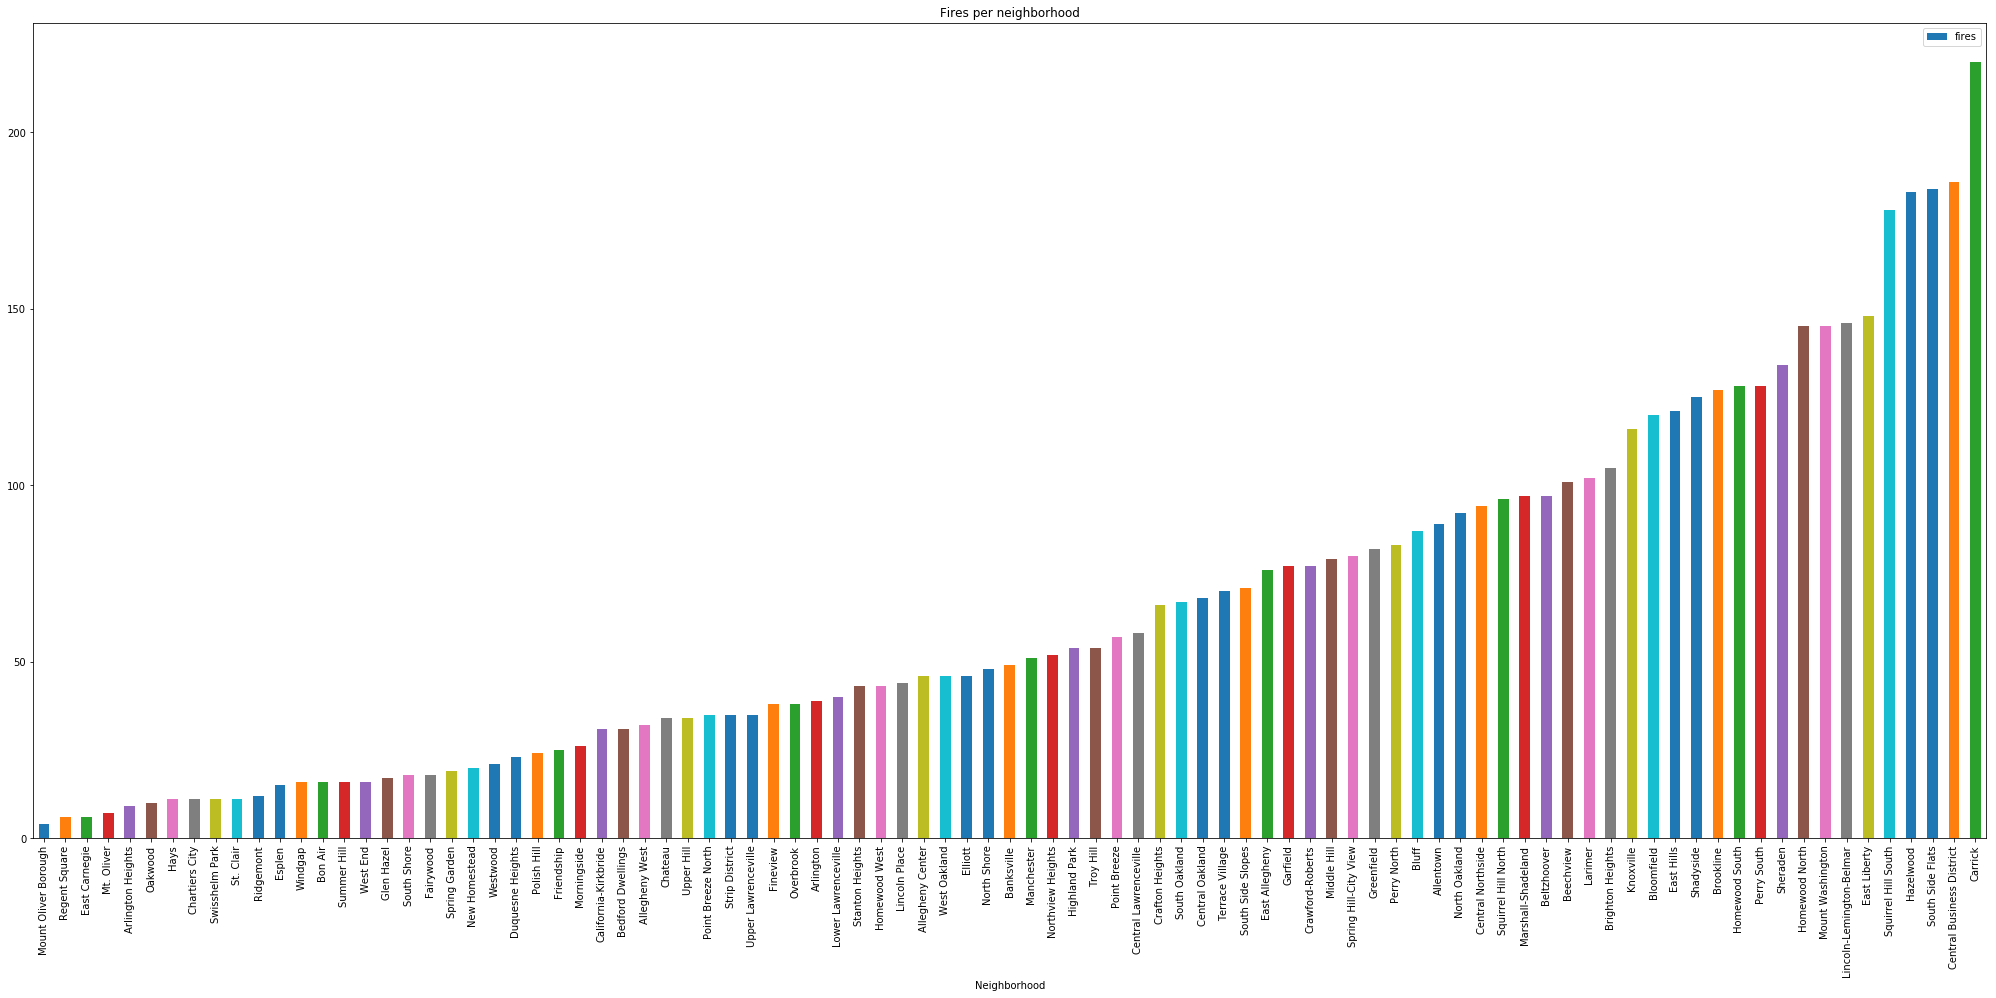

In [61]:
fire = pd.read_csv("fire.csv")
fire_count = fire.groupby("neighborhood").count()["call_no"]
fire_count = fire_count.sort_values(ascending = True)
fire_count_df = fire_count.to_frame()
fire_count_df = fire_count_df.reset_index(level = 'neighborhood')
fire_count_df.columns=["Neighborhood", "fires"]
fire_count_df.plot(kind = 'bar', figsize = (35, 15), title = 'Fires per neighborhood', x="Neighborhood", y="fires")

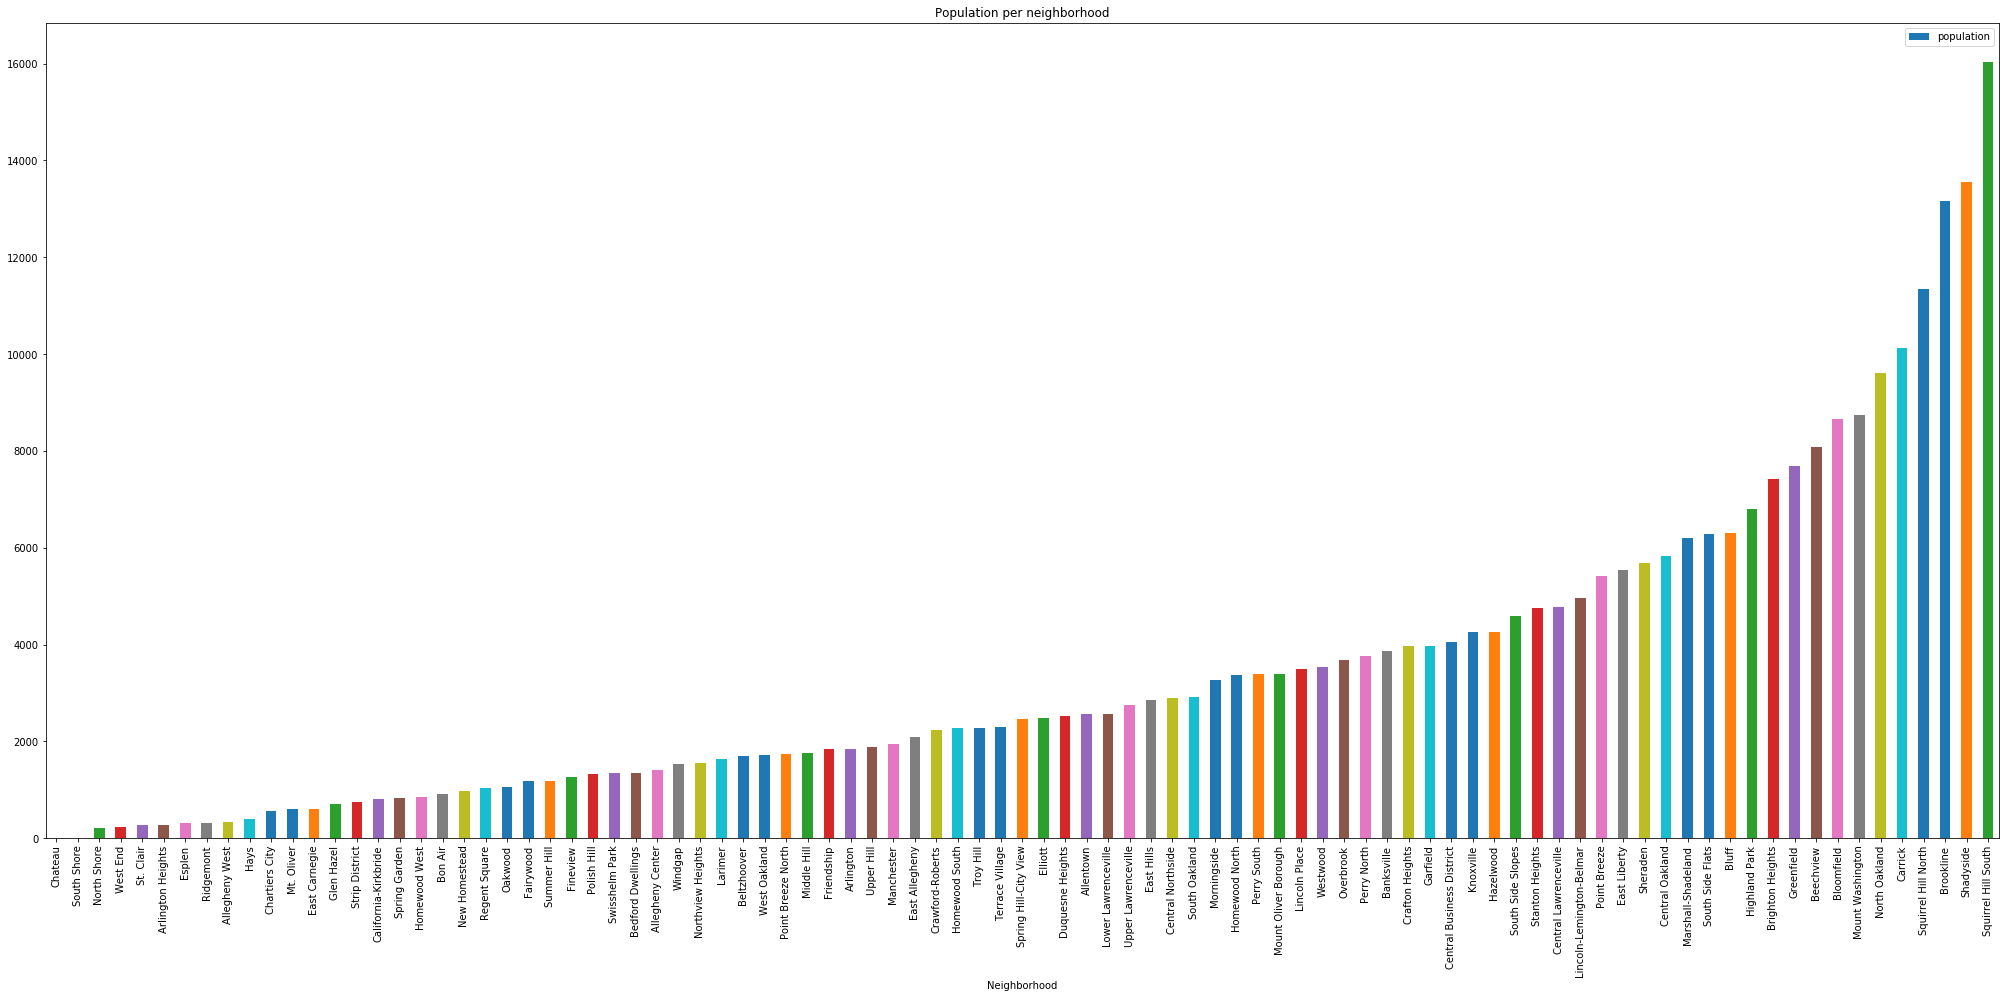

In [76]:
population = pd.read_csv("population.csv")
population_sorted = population.sort_values("Neighborhood")
population_sorted.columns=["Neighborhood", "id", "population", "Margin of error"]
population_sorted.sort_values(by="population").plot(kind = 'bar', figsize = (35, 15), title = 'Population per neighborhood', x="Neighborhood", y="population")

In [56]:
neighborhood_series = pd.Series(population_sorted["Neighborhood"])
neighborhood_series
neighborhood_series_df = neighborhood_series.to_frame()
#neighborhood_series_df

In [57]:
'''combined = pd.merge(fire_count_df,
                    neighborhood_series_df,
                    on = '',
                    how = 'outer')
combined'''
combined = pd.merge(population_sorted,
                   neighborhood_series_df,
                   on = 'Neighborhood'
                   )
combined1 = pd.merge(combined,
                     fire_count_df,
                     on = "Neighborhood"
                     )
combined2 = pd.merge(combined1,
                     arrest_count_df,
                     on = "Neighborhood"
                     )

In [59]:
average = []
thing = len(combined2)
for index, row in combined2.iterrows():
    average.append( (row["arrests"]+row["fires"])/row["population"] )
combined2["incident score"] = average

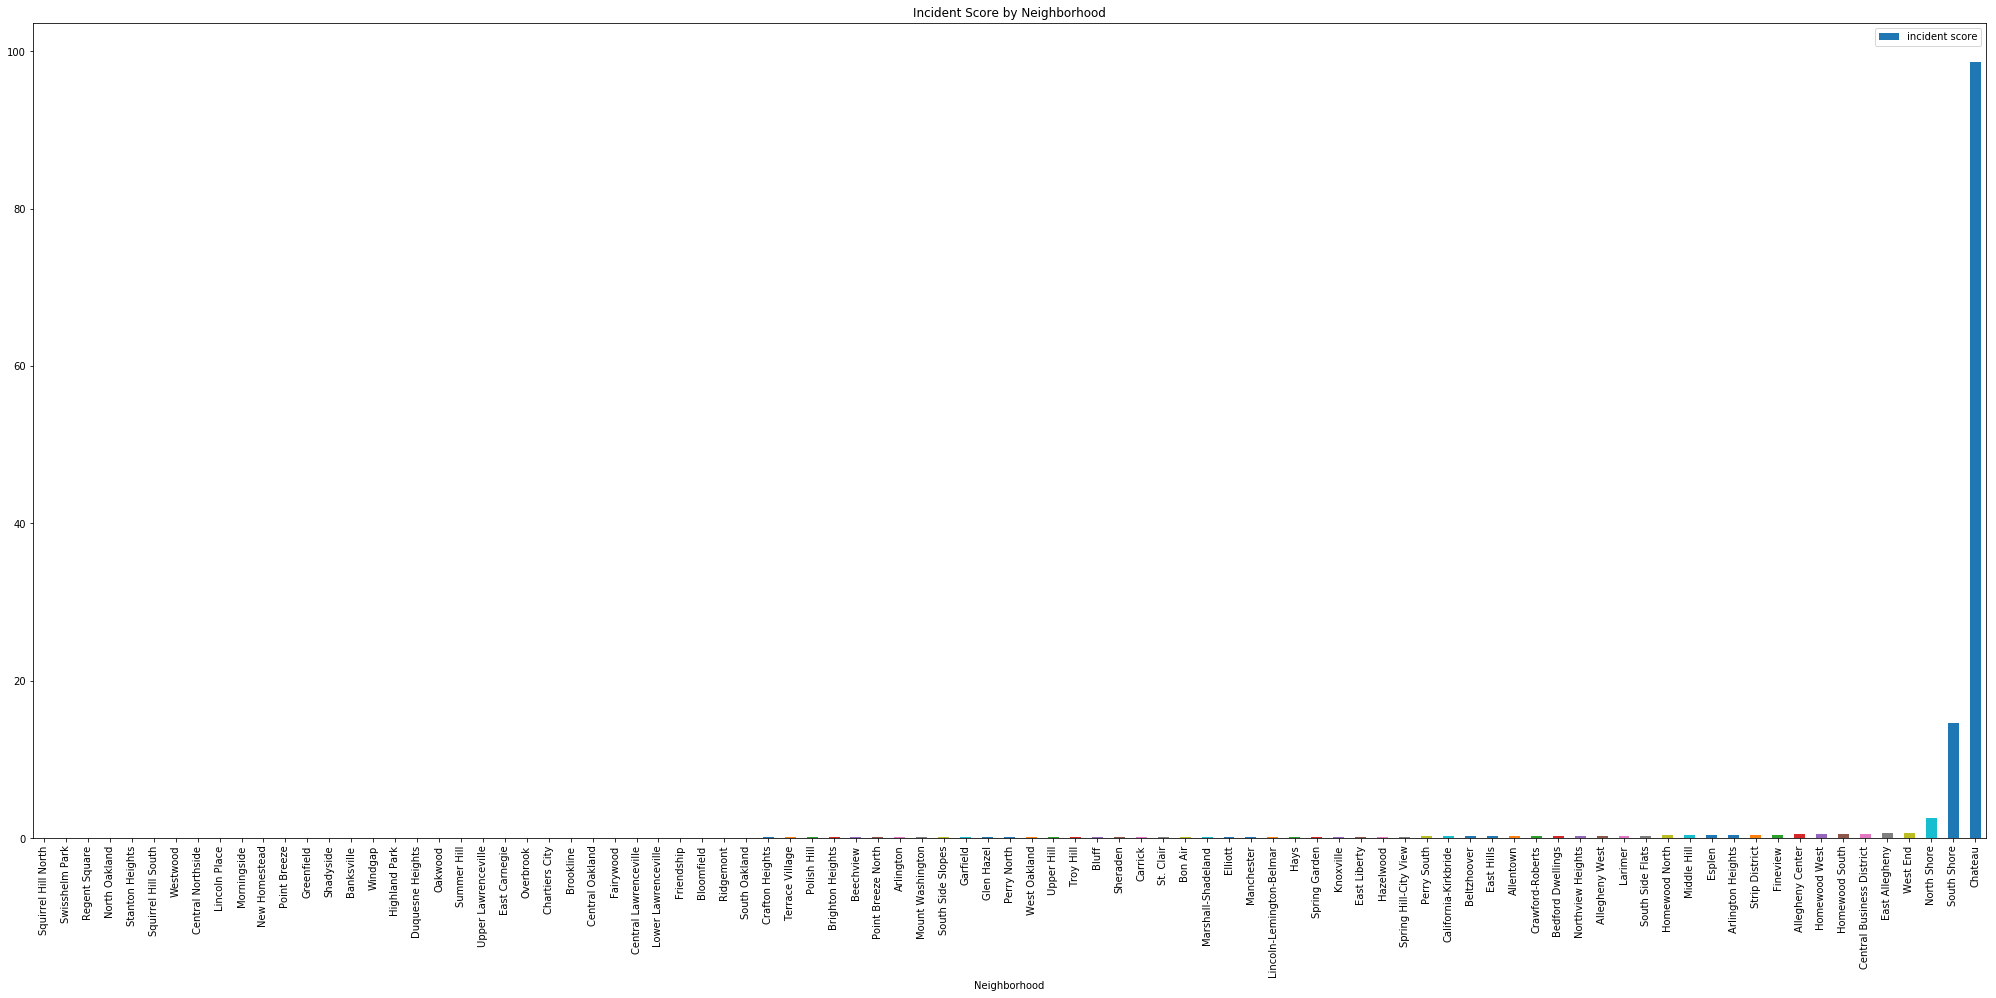

In [70]:
final = combined2.sort_values(ascending = True, by = "incident score")
final = final[['Neighborhood', 'population', 'fires', 'arrests', 'incident score']]
final = final.set_index(['Neighborhood'])
final.plot(kind = 'bar', figsize = (35, 15), y='incident score', title = 'Incident Score by Neighborhood')

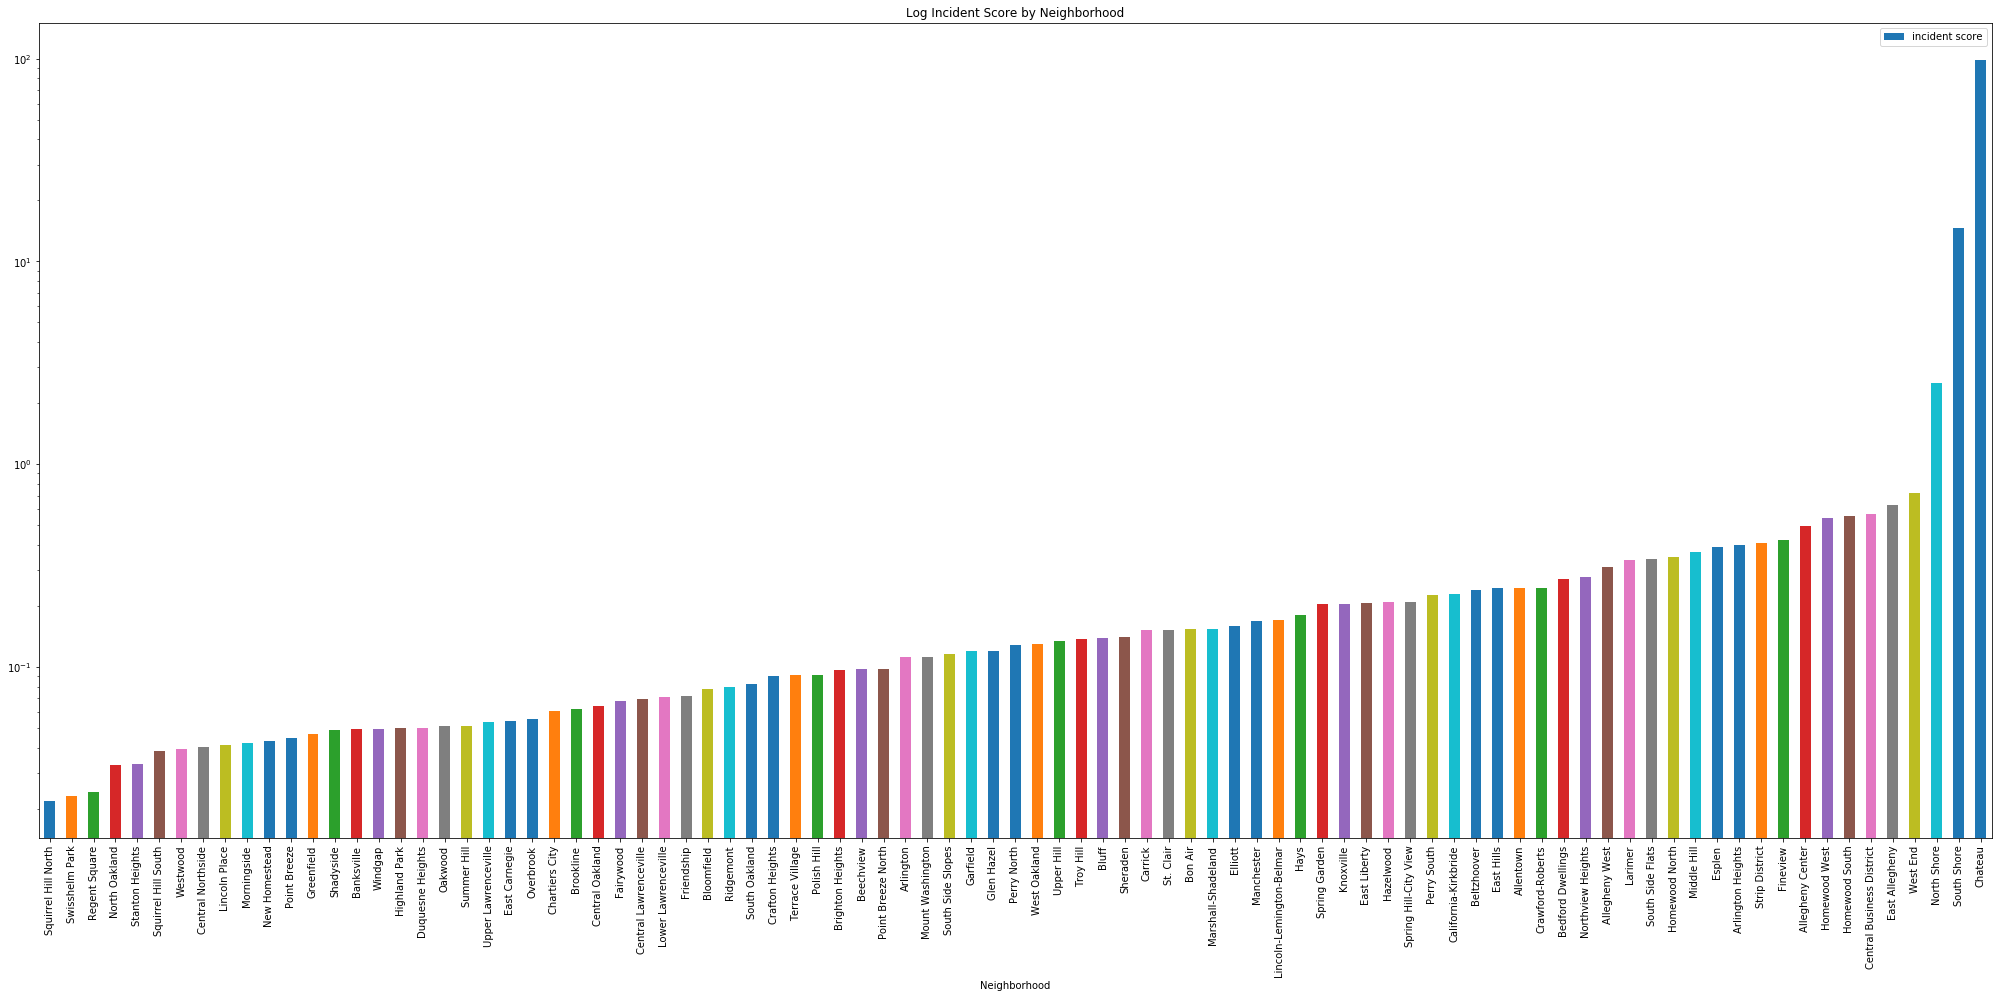

In [73]:
#regular bar graph
final.plot(kind = 'bar', figsize = (35, 15), title = 'Log Incident Score by Neighborhood', y='incident score', logy=True)

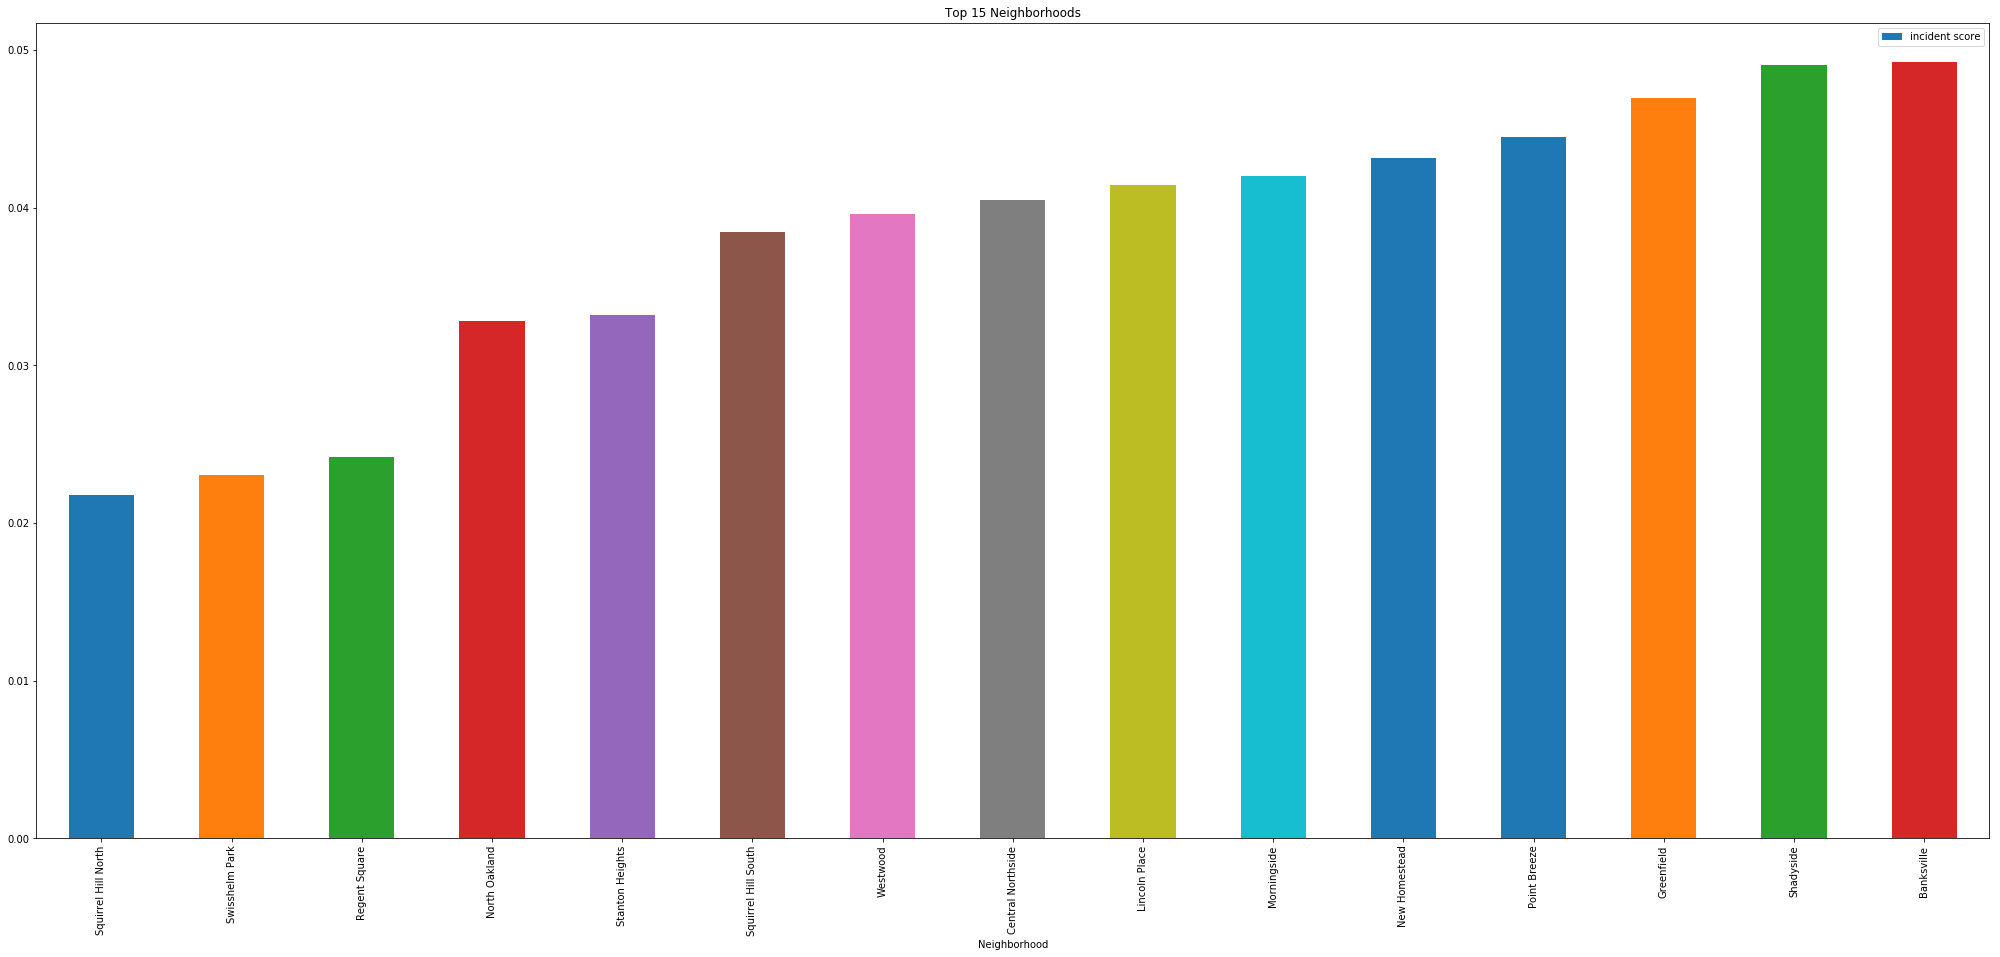

In [74]:
final.head(15).plot(kind = 'bar', figsize = (35, 15), title = 'Top 15 Neighborhoods', y='incident score')